## This Notebook is to familiarize the Bank of Canada dataset

Dataset source: https://www.bankofcanada.ca/markets/market-operations-liquidity-provision/covid-19-actions-support-economy-financial-system

Api to be used: Valet_api

The Bank of Canada Valet Web Services offers programmatic access to global financial data. By using the Valet API, you can retrieve financial data and information from the Bank of Canada — such as daily exchange rates of the Canadian dollar against the European euro.

In [53]:
import pandas
import numpy as pd
import matplotlib
import datetime

In [54]:
# Install valet_api from bank of Canada
#https://pypi.org/project/pyvalet/

In [55]:
pip install pyvalet

Note: you may need to restart the kernel to use updated packages.


In [56]:
from pyvalet import ValetInterpreter

vi = ValetInterpreter()

## Bankers’ Acceptance Purchase Facility (BAPF)
To support the continuous functioning of financial markets, the Bank of Canada purchases Bankers’ Acceptances (BAs) in the secondary market through the Bankers’ Acceptance Purchase Facility (BAPF). The BA market is one of Canada’s core funding markets and a key source of financing for small- and medium-size corporate borrowers.

The BAPF program just started since March 23rd.

In [61]:
# Data retrieval for BAPF
BAPF_group = vi.get_group_observations("BANKERS_ACCEPTANCE_PURCHASE_FACILITY", response_format='csv')


In [62]:
#Check data
BAPF_group["Date"] = BAPF_group["\ndate\""]
del BAPF_group["\ndate\""]
BAPF_group = BAPF_group.set_index("Date")
BAPF_group 

,BAPF_SETTLEMENT_DATE,BAPF_MATURITY_DATE_START,BAPF_MATURITY_DATE_END,BAPF_AMOUNT_PURCHASED,BAPF_AMOUNT_TO_BE_PURCHASED,BAPF_RESERVE_RATE,BAPF_WEIGHTED_AVG_YIELD
Date,,,,,,,
2020-03-23,2020-03-25,2020-03-26,2020-05-04,15000.0,15000.0,0.63,1.57
2020-03-30,2020-04-01,2020-04-02,2020-07-21,20000.0,20000.0,0.43,1.15
2020-04-06,2020-04-08,2020-04-09,2020-07-28,5570.0,20000.0,0.40,0.52
2020-04-13,2020-04-15,2020-04-16,2020-08-04,2660.0,10000.0,0.37,0.39
2020-04-20,2020-04-22,2020-04-23,2020-08-11,190.0,10000.0,0.40,0.40
2020-04-27,2020-04-29,2020-04-30,2020-08-18,3630.0,10000.0,0.40,0.40
2020-05-04,2020-05-06,2020-05-07,2020-08-25,0.0,10000.0,0.40,NaN
2020-05-11,2020-05-13,2020-05-14,2020-09-01,0.0,10000.0,0.40,NaN
2020-05-19,2020-05-20,2020-05-21,2020-09-08,0.0,10000.0,0.40,NaN


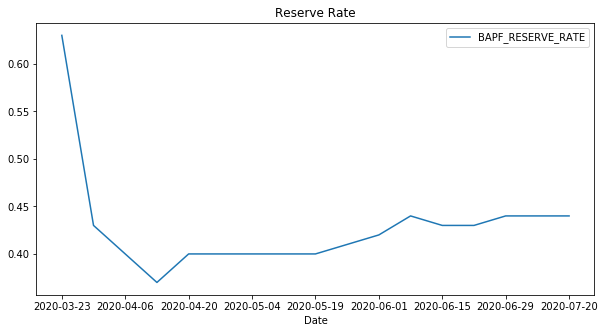

In [70]:
BAPF_group[["BAPF_RESERVE_RATE"]].plot(figsize = (10,5), title = "Reserve Rate")
